# **Class Assignment: Analysis of Variance for Regression - Part I (20 points)**

#### **Meg Bucich**


---
**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>

The goal of this assignment is to code all aspects of an ANOVA analysis by hand (in R).

1. We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  Run the following command to view the `mtcars` dataset

    `head(mtcars)`

2. We are interested in investigating the relationship between quarter mile time `qsec` (seconds) as our response and weight `wt` as our predictor using a simple linear regression.

  As always, we should plot our data before running our regressions!

  * Plot a scatterplot with `wt` on the x-axis and  `qsec` on the y-axis. What are your observations? Is the relationships linear? quadratic? Is there no relationship? Explain your answer in complete sentences.

In [53]:
#1
head(mtcars)
print(dim(mtcars)) # Display the dimensions of the dataset

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] 32 11


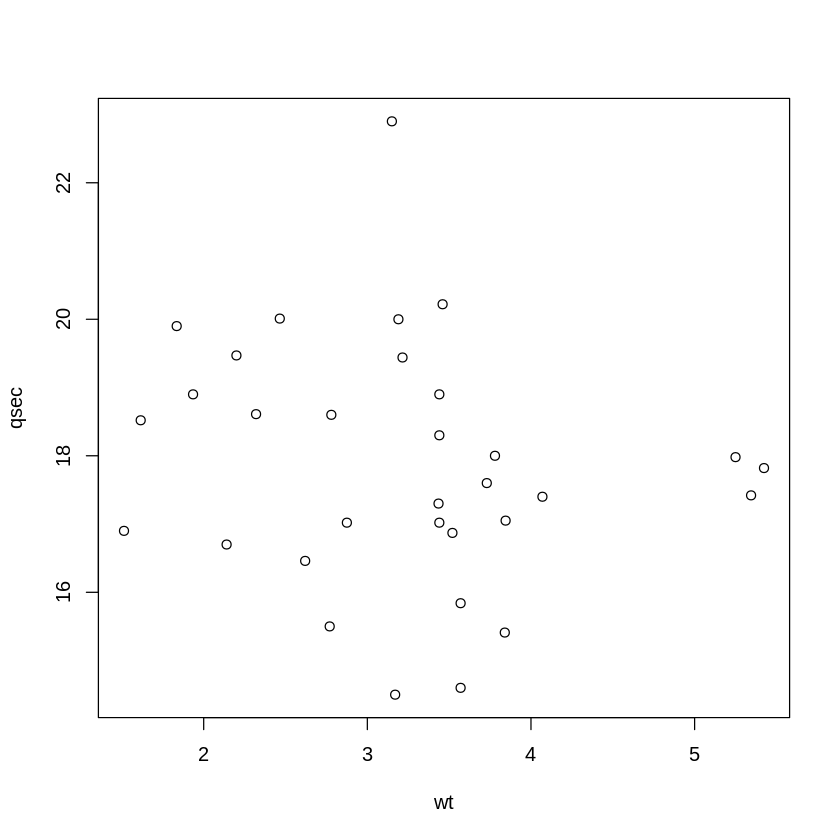

In [4]:
#2
qsec = mtcars$qsec # y
wt = mtcars$wt # x
plot(wt,qsec)

at a first glance, qsec does not seem to be related to wt. The data seems sporadic, with multiple qsec values that correspond to a singular wt term.

<br>

---

<br>






####<font color=red>Task 2</font>

1. Regress `qsec` on `wt` using the built-in `lm()` function and store as the variable `fit`. Summarize the fit using `summary()`.

2. Write down the null and alternative hypotheses of the t-test on the slope of the `wt` variable. What is your conclusion from this t-test?

3. Write down the null and alternative hypotheses of the ANOVA F-test on the entire regression model. What is your conclusion from this F-test?

4. Compare the t-statistic for `wt` with the F-statistic for the entire regression model. What is their relationship?

5. Compare the p-values for the t-test and F-test. Are they the same/different? Explain your answer.

In [5]:
#1
fit = lm(qsec ~ wt, data = mtcars)
summary(fit)


Call:
lm(formula = qsec ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3638 -1.0766  0.2051  0.8655  5.0298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8753     1.1025  17.120   <2e-16 ***
wt           -0.3191     0.3283  -0.972    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 30 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  -0.00179 
F-statistic: 0.9446 on 1 and 30 DF,  p-value: 0.3389


In [34]:
#2 t test on wt

$$H_{0}: \hat\beta_{1} = 0 $$
$$H_{a}:\hat\beta_{1} \neq 0 $$

p value is .339, which is greater than .05 so we fail to reject the null :(

In [35]:
#3 f-test on wt

$$H_{0}: \hat\beta_{1} = 0 $$
$$H_{a}:\hat\beta_{1} \neq 0 $$

p-value for the f-test is also .3389 which is still greater than .05 so we still fail to reject the null :(

In [37]:
#4 relationship between F and t statistic
t_stat = -.972
f_stat = .9446
sqrt(f_stat)

[1] 0.9719053

$\sqrt{F^{*}} = t^{*}$

In [38]:
#5


they have the same p-value because they are the same test when we are only testing one variable



<br>

---

<br>






####<font color=red>Task 3</font>

1. Regress `qsec` on `wt`, `mpg`, `drat`, and `hp` using the built-in `lm()` function and store as the variable `fit`. Summarize the fit using `summary()`.

2. Write down the mathematical representation of this regression formula.

3. Write down the null and alternative hypotheses of the ANOVA F-test on the entire regression model. What is your conclusion from this F-test?



In [66]:
#1
wt = mtcars$wt
mpg = mtcars$mpg
drat = mtcars$drat
hp = mtcars$hp
fit = lm(qsec ~ wt + mpg + drat + hp, data = mtcars)
summary(fit)


Call:
lm(formula = qsec ~ wt + mpg + drat + hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5565 -0.4885 -0.1685  0.4196  3.6977 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.306510   3.558682   4.582 9.36e-05 ***
wt           1.228535   0.430531   2.854   0.0082 ** 
mpg          0.098848   0.081104   1.219   0.2335    
drat        -0.239354   0.542624  -0.441   0.6626    
hp          -0.024101   0.004637  -5.197 1.79e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.099 on 27 degrees of freedom
Multiple R-squared:  0.6704,	Adjusted R-squared:  0.6216 
F-statistic: 13.73 on 4 and 27 DF,  p-value: 3.121e-06


In [11]:
#2 mathematical representation of regression formula

$\hat{qsec} = 16.306510 + 1.228535\hat{wt} + 0.098848\hat{mpg} - 0.239354\hat{drat} - 0.024101\hat{hp}$

In [12]:
#3 null/alternative hypothesis, run F-test, what is your conclusion

$$$$

$$H_{0}: \hat\beta_{wt} = \hat\beta_{mpg} = \hat\beta_{drat} = \hat\beta_{hp}= 0$$
$$H_{0}: \text{at least one of } \hat\beta_{wt} ,\hat\beta_{mpg}, \hat\beta_{drat}, \hat\beta_{hp} \neq  0$$





the F-statistic is large (good, means our SSR is large) and we have a p-value of 0.007 which is less than 0.05 so we reject the null hypothesis

####<font color=red>Task 4</font>

The ANOVA F-test compares the variability explained by our predictors (exluding the intercept) to the variability explained by only the y-intercept (i.e. only noise).

1. Regress `qsec` only on the intercept using the following code.
```
fit_intonly <- lm(qsec ~ 1, data = mtcars)
```
The following code runs an ANOVA F-test on our complete regression model from Task 3. Only interpret the second row.
```
anova(fit_intonly, fit)[2,]
```
*   `Res.Df` is the SSErr degrees of freedom
*   `RSS` SSErr
*   `Df` is the SSReg degrees of freedom
*   `Sum of Sq` is SSReg

2. Calculate the regression sum of squares and store as `ssreg`. <center> $SSReg = \sum_i(\hat{Y}_i - \bar{Y})^2$ </center>
Verify your answer using the table in 4.1.

3. Calculate the residual (error) sum of squares and store as `sserr`. <center> $SSErr = \sum_i(Y_i - \hat{Y}_i)^2$</center>
Verify your answer using the table in 4.1.

4. Calculate the F-statistic for this test as store as `fstat`.
<center> $F^* = \frac{SSReg / p-1}{SSErr / n-p}$ </center>
Verify your answer using the table in 4.1.

5. Calculate the p-value for this F-test using `1 - pf(fstat, p-1, n-p)`. Verify your answer using the table in 4.1.


In [67]:
#1
fit_intonly = lm(qsec ~ 1, data = mtcars)
anova(fit_intonly, fit)[2,]

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,27,32.62256,4,66.36559,13.73184,3.121235e-06


In [68]:
#2
yhat = 16.306510 + 1.228535*wt + 0.098848*mpg - 0.239354*drat - 0.024101*hp
ybar = mean(qsec)
ssreg = sum((yhat - ybar)^2)
ssreg

[1] 66.36486

In [69]:
#3
y_data = qsec
yhat = 16.306510 + 1.228535*wt + 0.098848*mpg - 0.239354*drat - 0.024101*hp
sserr = sum((y_data - yhat)^2)
sserr



[1] 32.62256

In [70]:
#4
n = 32
p = 5
num = ssreg / (p-1)
denom = sserr / (n-p)
fstat = num / denom
fstat



[1] 13.73169

In [71]:
#5
1 - pf(fstat, p-1, n-p)

[1] 3.121536e-06

<br>

---

<br>






####<font color=red>Task 5</font>

1. Using the ANOVA table from 4.1, calculate the total sum of squares (SSTO) and store as `ssto`.

2. Use `ssreg` and `ssto` to calculate the coefficient of multiple determination ($R^2$) for the regression and store as `r2`.

  Verify your answer with the regression summary (Multiple R-squared).

3. What is the interpretation of your $R^2$?

4. Calculate the adjusted $R^2$ by hand (in R) and store as `r2_adj`.
<center> $R^2_a = 1 - \frac{SSErr / (n-p)}{SSTot / (n-1)}$ </center>
Verify your answer with the regression summary (Adjusted R-squared).

5. Is the adjusted $R^2$ greater or less than the multiple $R^2$? Explain your answer.

In [72]:
#1
ssto = sserr + ssreg
ssto

[1] 98.98742

In [74]:
#2
r2 = ssreg / ssto
r2

[1] 0.6704373

In [20]:
#3


its okay. its closer to 1 than it is zero. we used 4 different variables so it makes sense that its not super large

In [76]:
#4
r2_adj = 1 - (ssreg/(n-p)) / (ssto/(n-1))
r2_adj

[1] 0.2302386

In [22]:
#5

the adjusted $R^{2}$ is smaller than the original $R^{2}$ term because we divide by $n-p$ which is the term that allows $R^{2}$ to decrease when we add variables to the model